In [1]:
from numpy import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.cross_validation import train_test_split

t_X,t_y=load_svmlight_file('a9a.t') #读取数据
X_train,X_test, y_train, y_test =train_test_split(t_X,t_y,test_size=0.4, random_state=1)#分割数据

C:\Users\lkz\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def Loss(y,output):
    loss = +(y * np.log(output)).sum(axis=1)
    return loss

In [3]:
def trainLogRegres(train_x,train_y,opts):
    numSamples,numFeatures=shape(train_x)
    iter=opts['iter']
    alpha=opts['alpha']
    weights=zeros((numFeatures,1))
    Gt=zeros((numFeatures,1))
    deltat = zeros((numFeatures, 1))
    mt = zeros((numFeatures, 1))
    for t in range(iter):
        if opts['optimizeType']=='stocGradDecent':#随机梯度
            i=random.randint(0,numSamples)
            output=sigmoid(train_x[i,:]*weights)
            error=train_y[i]-output
            loss=Loss(train_y,output)
            lossList.append(loss)
            g = train_x[i,:].transpose() * error
            weights = weights - alpha * g
        elif opts['optimizeType']=='NAG': #NGA
            yita=opts['yita']
            vt = zeros(train_y.shape)
            i = random.randint(0, numFeatures)
            output = sigmoid(train_x[i, :] * weights-yita*vt)
            error = train_y[i] - output
            loss = Loss(train_y, output)
            lossList.append(loss)
            vt=yita*vt+alpha * train_x[i, :].transpose() * error
            weights = weights - vt
        elif opts['optimizeType']=='RMSProp': #RMSProp
            yita=opts['yita']
            i = random.randint(0, numFeatures)
            output = sigmoid(train_x[i, :] * weights)
            error = train_y[i] - output
            g = train_x[i, :].transpose() * error
            Gt=yita*Gt+(1-yita)*multiply(g,g)
            loss = Loss(train_y, output)
            lossList.append(loss)
            weights=weights-multiply(alpha/np.sqrt(Gt+1e-8),g)
        elif opts['optimizeType']=='AdamDelta':  #AdamDelta
            yita = opts['yita']
            i=random.randint(0,numFeatures)
            output=sigmoid(train_x[i,:]*weights)
            error=train_y[i]-output
            g = train_x[i,:].transpose() * error
            Gt = Gt + (1 - yita) * multiply(g, g)
            deltaWeight=-multiply((np.sqrt(deltat+1e-6)/np.sqrt(Gt+1e-6)),g)
            loss = Loss(train_y, output)
            lossList.append(loss)
            weights=weights+deltaWeight
            deltat=yita*deltat+(1-yita)*multiply(deltaWeight,deltaWeight)
        elif opts['optimizeType']=='Adam':  #Adam
            yita = opts['yita']
            beta=opts['beta']
            alpha=opts['alpha']
            beta1=0.9
            i=random.randint(0,numFeatures)
            output=sigmoid(train_x[i,:]*weights)
            loss = Loss(train_y, output)
            lossList.append(loss)
            error=train_y[i]-output
            g = train_x[i,:].transpose() * error
            mt=beta*mt+(1-beta)*g
            Gt = Gt + (1 - yita) * multiply(g, g)
            alpha=alpha*math.sqrt(1-yita**t)/(1-beta1**(t+1))
            weights=weights-alpha*mt/np.sqrt(Gt+1e-8)

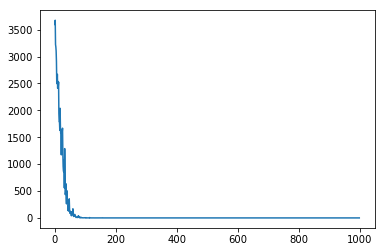

In [4]:
opts={'alpha':0.01,'iter':1000,'optimizeType':'stocGradDecent','yita':0.95,'beta':0.9}  
lossList=[]
trainLogRegres(X_train,y_train,opts)  #训练随机梯度
iter=list(range(0,1000))
plt.plot(iter,lossList)
plt.show()

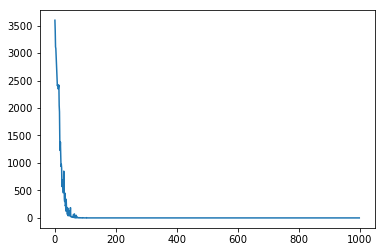

In [5]:
opts={'alpha':0.01,'iter':1000,'optimizeType':'NAG','yita':0.95,'beta':0.9}   
lossList=[]
trainLogRegres(X_train,y_train,opts)  #训练NAG
iter=list(range(0,1000))
plt.plot(iter,lossList)
plt.show()

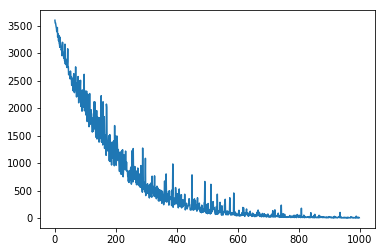

In [6]:
opts={'alpha':0.001,'iter':1000,'optimizeType':'RMSProp','yita':0.9,'beta':0.9}
lossList=[]
trainLogRegres(X_train,y_train,opts)  #训练RMSProp
iter=list(range(0,1000))
plt.plot(iter,lossList)
plt.show()

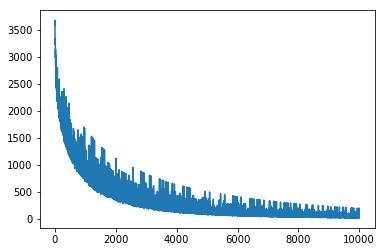

In [7]:
opts={'alpha':0.01,'iter':10000,'optimizeType':'AdamDelta','yita':0.9,'beta':0.9}
lossList=[]
trainLogRegres(X_train,y_train,opts)  #训练AdamDelta
iter=list(range(0,10000))
plt.plot(iter,lossList)
plt.show()

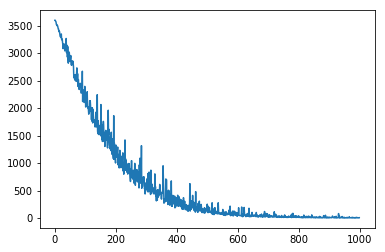

In [8]:
opts={'alpha':0.001,'iter':1000,'optimizeType':'Adam','yita':0.999,'beta':0.9}
lossList=[]
trainLogRegres(X_train,y_train,opts)  #训练Adam
iter=list(range(0,1000))
plt.plot(iter,lossList)
plt.show()